## Prediction Of Consumer Credit Risk Using Machine Learning 

Predicting a person's ability to obtain a bank loan is a critical issue that affects both individuals and financial institutions. Banks and other lenders must evaluate the risk of lending money to individuals, and a borrower's creditworthiness is an important factor in determining whether they will be approved for a loan.

In [ ]:
import os
import itertools
import collections

import pandas as pd

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sn

dataset : https://www.kaggle.com/datasets/ppb00x/credit-risk-customers

In [ ]:
data = pd.read_csv("/content/credit_customers.csv")
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


### Data Exploration and Preprocessing

This dataset needs to be explored inorder to understand what features are available and how they can be used in training a model. The dataset also needs to be preprossed so that the data is clean and allows the model to obtain maximum accuracy.

In [ ]:
data = data.dropna()
data.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

Here the features are graphicaly represented inorder to understand how they are distributed. This also helps to identify any imbalances in the dataset.

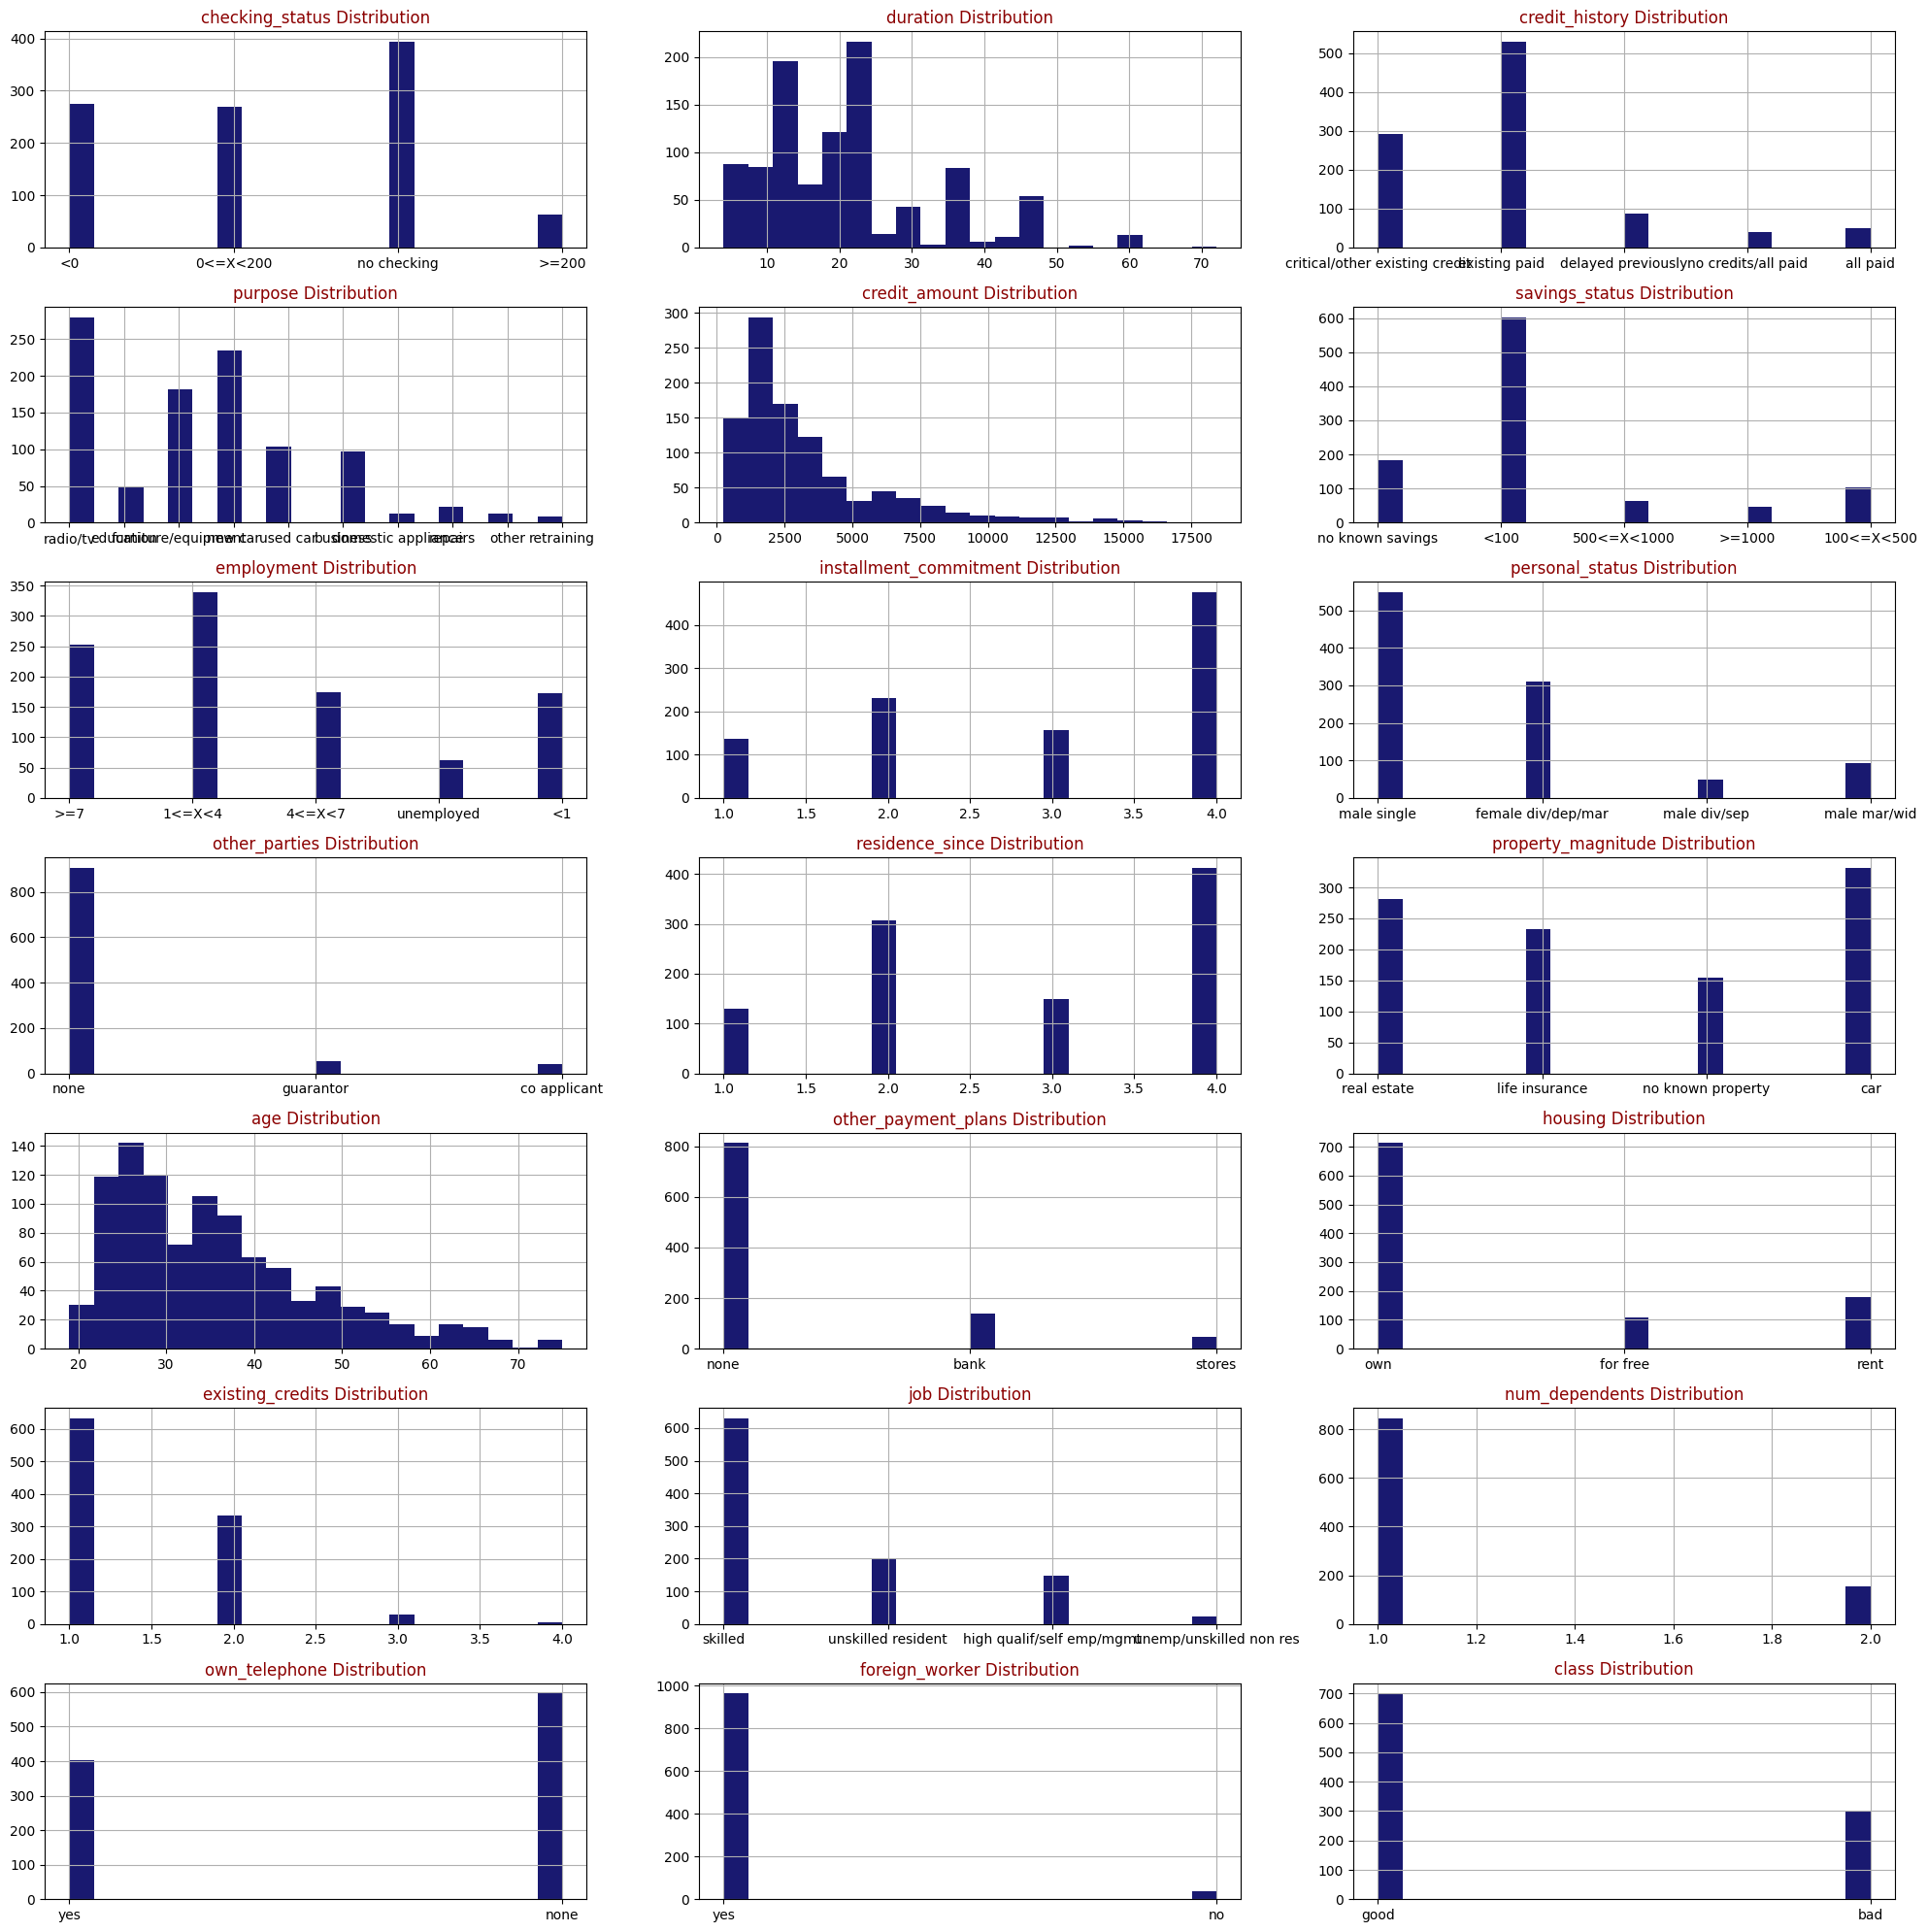

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(data,data.columns,7,3)

Next, each categorical features are explored further and label encoding and ordinal encoding is done

In [ ]:
data = data.replace({'class': {'good': 0, 'bad': 1}})
data['class'].value_counts()

0    700
1    300
Name: class, dtype: int64

In [ ]:
data['checking_status'].value_counts()

no checking    394
<0             274
0<=X<200       269
>=200           63
Name: checking_status, dtype: int64

In [ ]:
data = data.replace({'checking_status': {'no checking': 0, '<0': 1, '0<=X<200': 2, '>=200': 3}})
data['checking_status'].value_counts()

0    394
1    274
2    269
3     63
Name: checking_status, dtype: int64

In [ ]:
data['credit_history'].value_counts()

existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: credit_history, dtype: int64

In [ ]:
data = data.replace({'credit_history': {'existing paid': 0, 'critical/other existing credit': 1, 'delayed previously': 2, 'all paid': 3, 'no credits/all paid': 4}})
data['credit_history'].value_counts()

0    530
1    293
2     88
3     49
4     40
Name: credit_history, dtype: int64

In [ ]:
data['purpose'].value_counts()

radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance      12
other                   12
retraining               9
Name: purpose, dtype: int64

In [ ]:
data = data.replace({'purpose': {'radio/tv': 0, 'new car': 1, 'furniture/equipment': 2, 'used car': 3, 'business': 4, 'education': 5, 'repairs': 6, 'domestic appliance': 7, 'other': 8, 'retraining': 9}})
data['purpose'].value_counts()

0    280
1    234
2    181
3    103
4     97
5     50
6     22
7     12
8     12
9      9
Name: purpose, dtype: int64

In [ ]:
data['foreign_worker'].value_counts()

yes    963
no      37
Name: foreign_worker, dtype: int64

In [ ]:
data = data.replace({'foreign_worker': {'yes': 0, 'no': 1}})
data['foreign_worker'].value_counts()

0    963
1     37
Name: foreign_worker, dtype: int64

In [ ]:
data['own_telephone'].value_counts()

none    596
yes     404
Name: own_telephone, dtype: int64

In [ ]:
data = data.replace({'own_telephone': {'none': 0, 'yes': 1}})
data['own_telephone'].value_counts()

0    596
1    404
Name: own_telephone, dtype: int64

In [ ]:
data['savings_status'].value_counts()

<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: savings_status, dtype: int64

In [ ]:
data = data.replace({'savings_status': {'<100': 0, 'no known savings': 1, '100<=X<500': 2, '500<=X<1000': 3, '>=1000': 4}})
data['savings_status'].value_counts()

0    603
1    183
2    103
3     63
4     48
Name: savings_status, dtype: int64

In [ ]:
data['employment'].value_counts()

1<=X<4        339
>=7           253
4<=X<7        174
<1            172
unemployed     62
Name: employment, dtype: int64

In [ ]:
data = data.replace({'employment': {'1<=X<4': 0, '>=7': 1, '4<=X<7': 2, '<1': 3, 'unemployed': 4}})
data['employment'].value_counts()

0    339
1    253
2    174
3    172
4     62
Name: employment, dtype: int64

In [ ]:
data['personal_status'].value_counts()

male single           548
female div/dep/mar    310
male mar/wid           92
male div/sep           50
Name: personal_status, dtype: int64

In [ ]:
data = data.replace({'personal_status': {'male single': 0, 'female div/dep/mar': 1, 'male mar/wid': 2, 'male div/sep': 3}})
data['personal_status'].value_counts()

0    548
1    310
2     92
3     50
Name: personal_status, dtype: int64

In [ ]:
data['other_parties'].value_counts()

none            907
guarantor        52
co applicant     41
Name: other_parties, dtype: int64

In [ ]:
data = data.replace({'other_parties': {'none': 0, 'guarantor': 1, 'co applicant': 2}})
data['other_parties'].value_counts()

0    907
1     52
2     41
Name: other_parties, dtype: int64

In [ ]:
data['property_magnitude'].value_counts()

car                  332
real estate          282
life insurance       232
no known property    154
Name: property_magnitude, dtype: int64

In [ ]:
data = data.replace({'property_magnitude': {'car': 0, 'real estate': 1, 'life insurance': 2, 'no known property': 154}})
data['property_magnitude'].value_counts()

0      332
1      282
2      232
154    154
Name: property_magnitude, dtype: int64

In [ ]:
data['job'].value_counts()

skilled                      630
unskilled resident           200
high qualif/self emp/mgmt    148
unemp/unskilled non res       22
Name: job, dtype: int64

In [ ]:
data = data.replace({'job': {'skilled': 0, 'unskilled resident': 1, 'high qualif/self emp/mgmt': 2, 'unemp/unskilled non res': 3}})
data['job'].value_counts()

0    630
1    200
2    148
3     22
Name: job, dtype: int64

In [ ]:
data['housing'].value_counts()

own         713
rent        179
for free    108
Name: housing, dtype: int64

In [ ]:
data = data.replace({'housing': {'own': 0, 'rent': 1, 'for free': 2}})
data['housing'].value_counts()

0    713
1    179
2    108
Name: housing, dtype: int64

In [ ]:
data['other_payment_plans'].value_counts()

none      814
bank      139
stores     47
Name: other_payment_plans, dtype: int64

In [ ]:
data = data.replace({'other_payment_plans': {'none': 0, 'bank': 1, 'stores': 2}})
data['other_payment_plans'].value_counts()

0    814
1    139
2     47
Name: other_payment_plans, dtype: int64

After encoding is done all the data is in numerical format and this allows the data to be used be using with training algorithms

In [ ]:
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6.0,1,0,1169.0,1,1,4.0,0,0,...,1,67.0,0,0,2.0,0,1.0,1,0,0
1,2,48.0,0,0,5951.0,0,0,2.0,1,0,...,1,22.0,0,0,1.0,0,1.0,0,0,1
2,0,12.0,1,5,2096.0,0,2,2.0,0,0,...,1,49.0,0,0,1.0,1,2.0,0,0,0
3,1,42.0,0,2,7882.0,0,2,2.0,0,1,...,2,45.0,0,2,1.0,0,2.0,0,0,0
4,1,24.0,2,1,4870.0,0,0,3.0,0,0,...,154,53.0,0,2,2.0,0,2.0,0,0,1


### Under Sampling

During feature exploration the target feature was identified to be imbalanced and this needs to be addressed inorder to have an optimized dataset. Here the dataset contains an uneven distribution of instances under the "class" attribute, which can lead to biased results when training a machine learning model. Here under sampling is used which typically is done by randomly removing instances from the majority class until the dataset is balanced.

In [ ]:
data['class'].value_counts()

0    700
1    300
Name: class, dtype: int64

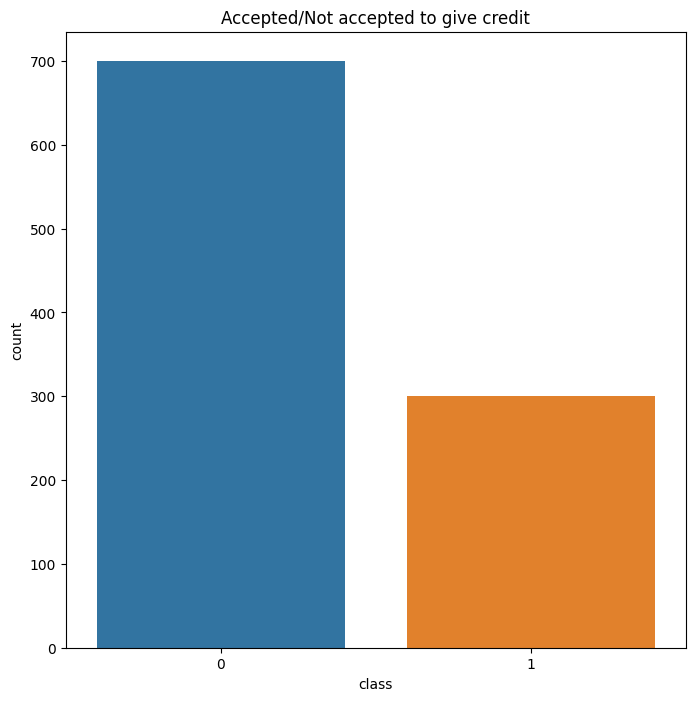

In [ ]:
# Plotting the dataset before normalization
plt.figure(figsize=(8,8))
sn.countplot(x='class', data=data)
plt.title('Accepted/Not accepted to give credit')
plt.show()

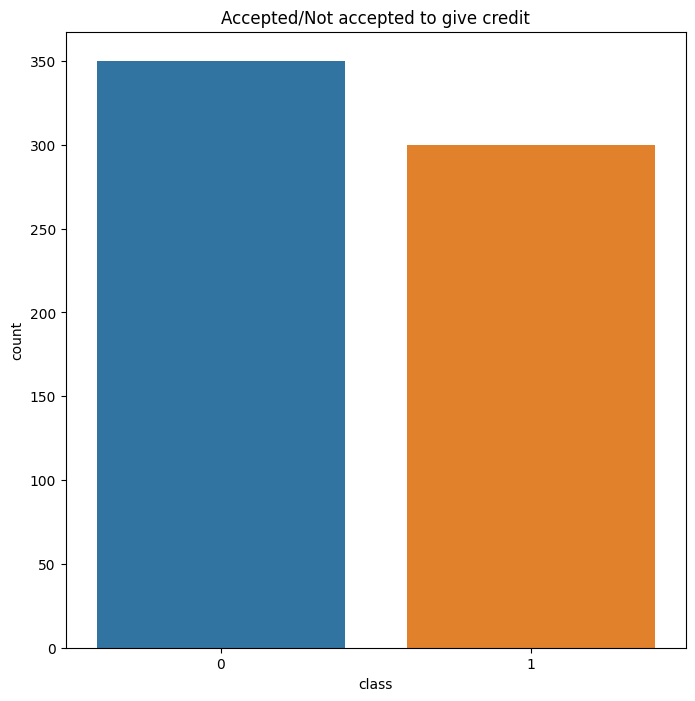

In [ ]:
# Normalizing dataset using undersampling method

# Shuffling the dataset
shuffled_data = data.sample(frac=1, random_state=4) 

#Creating data frames of the suitable and not suitable classes.
not_suitable = shuffled_data.loc[shuffled_data['class'] == 1] 
# Randomly select 10000 datas from majority class
suitable = shuffled_data.loc[shuffled_data['class'] == 0].sample(n=350, random_state=4) 

normalized_data = pd.concat([not_suitable, suitable]) # Concatenate all dataframes 

# Plotting the normalized dataset
plt.figure(figsize=(8,8))
sn.countplot(x='class', data=normalized_data)
plt.title('Accepted/Not accepted to give credit')
plt.show()

Heatmap is drawn as a graphical representation of data where the values of matrix are represented as colors. It checks the correlation among each attribute. Once the data is ready, the seaborn library is used to create the heatmap. The resulting heatmap will display the values of the matrix as a color-coded grid, where each color represents a specific value range.

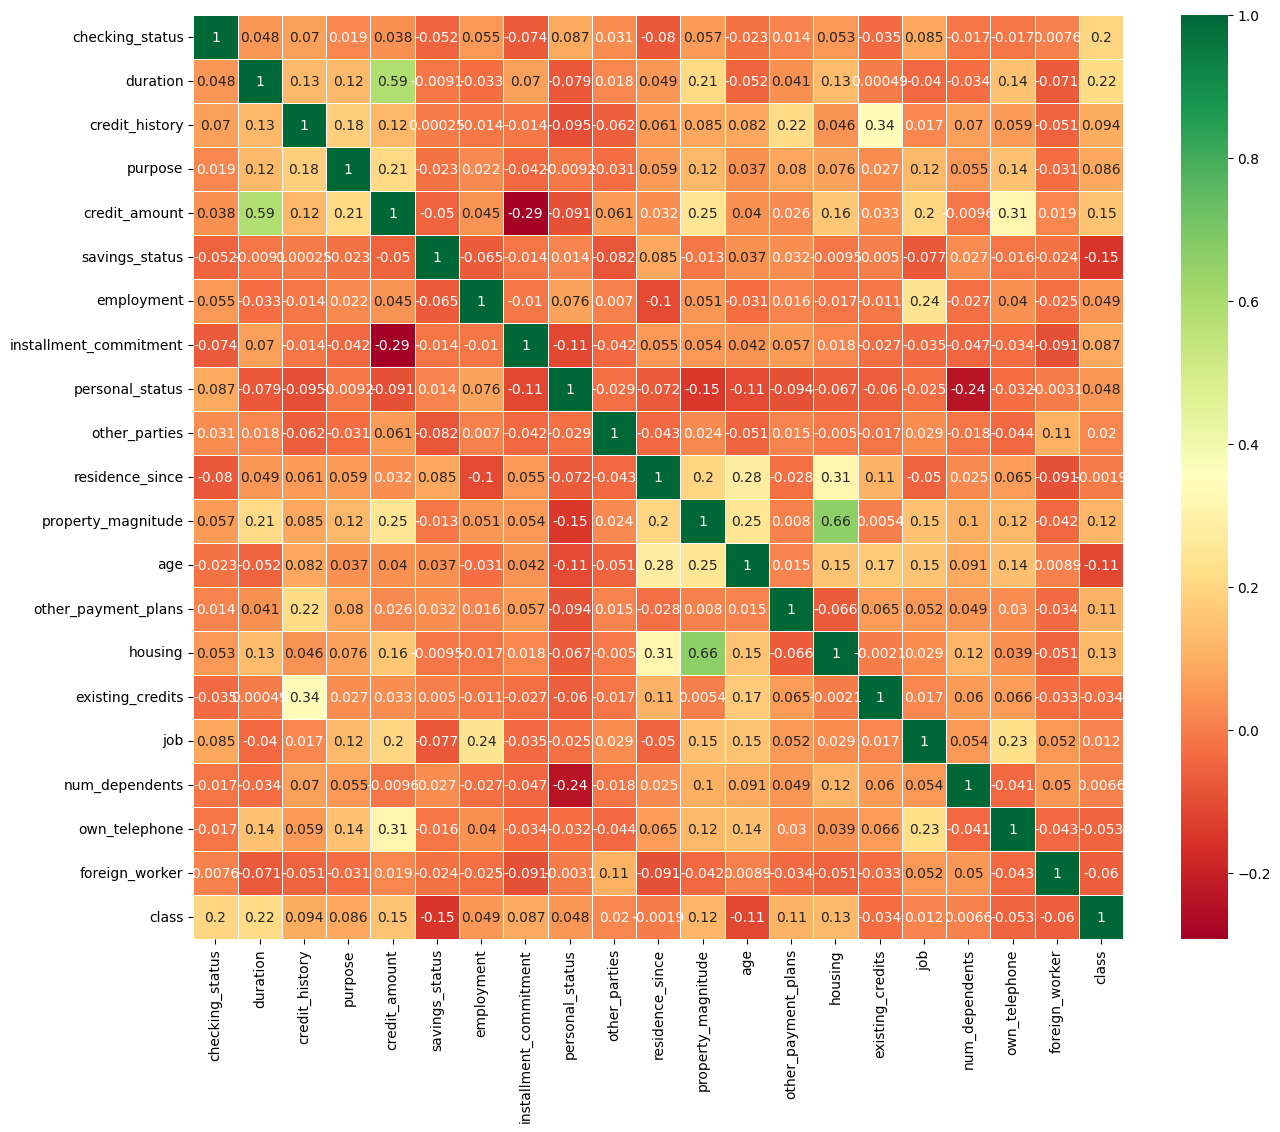

In [ ]:
#Creating a heat map of the dataset to identify correlation betweeen features.
sn.heatmap(normalized_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.5)
fig=plt.gcf()
fig.set_size_inches(15,12)
plt.show()

In [ ]:
normalized_data.groupby(['duration', 'class']).size()

duration  class
4.0       0         3
6.0       0        32
          1         9
7.0       0         3
8.0       0         2
          1         1
9.0       0        13
          1        14
10.0      0        10
          1         3
11.0      0         5
12.0      0        68
          1        49
13.0      0         1
14.0      0         1
          1         1
15.0      0        23
          1        12
16.0      1         1
18.0      0        34
          1        42
20.0      0         6
          1         1
21.0      0        11
          1         9
22.0      0         2
24.0      0        70
          1        56
27.0      0         4
          1         5
28.0      1         1
30.0      0        14
          1        13
33.0      0         2
          1         1
36.0      0        27
          1        37
39.0      0         2
          1         1
40.0      1         1
42.0      0         6
          1         3
45.0      0         1
          1         4
47.0      0     

In [ ]:
#Describing the normalized dataset(Count, Mean, Standerd deviation, quatiles, max)
normalized_data.describe().T

,count,mean,std,min,25%,50%,75%,max
checking_status,650.0,1.087692,0.927247,0.0,0.00,1.0,2.00,3.0
duration,650.0,22.003077,12.266933,4.0,12.00,18.0,27.00,72.0
credit_history,650.0,0.849231,1.155962,0.0,0.00,0.0,1.00,4.0
purpose,650.0,1.912308,1.907734,0.0,0.00,1.0,3.00,9.0
credit_amount,650.0,3450.741538,3021.327990,276.0,1382.25,2379.5,4305.25,18424.0
savings_status,650.0,0.706154,1.099710,0.0,0.00,0.0,1.00,4.0
employment,650.0,1.410769,1.316790,0.0,0.00,1.0,3.00,4.0
installment_commitment,650.0,2.992308,1.110922,1.0,2.00,3.0,4.00,4.0
personal_status,650.0,0.684615,0.878037,0.0,0.00,0.0,1.00,3.0
other_parties,650.0,0.143077,0.470540,0.0,0.00,0.0,0.00,2.0


### Splitting Traing and Test Data

To evaluate the performance of the model, the dataset split into training and testing sets. By splitting the dataset, we can ensure the model is not overfitting to the training data. In here x, y variables are defined as bellow,

X = independent attributes 
Y = Target Variable



In [ ]:
#Splitting the Class and the other features in the dataset
X = normalized_data.drop(['class'], axis=1)
Y = normalized_data['class']

In [ ]:
X.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
763,0,21.0,1,1,12680.0,1,1,4.0,0,0,4.0,154,30.0,0,2,1.0,2,1.0,1,0
790,2,21.0,0,4,1188.0,0,1,2.0,1,0,4.0,2,39.0,0,0,1.0,0,2.0,0,0
958,1,28.0,0,1,4006.0,0,0,3.0,0,0,2.0,0,45.0,0,0,1.0,1,1.0,0,0
517,0,36.0,1,2,7127.0,0,3,2.0,1,0,4.0,2,23.0,0,1,2.0,0,1.0,1,0
170,1,15.0,4,1,950.0,0,1,4.0,0,0,3.0,0,33.0,0,1,2.0,0,2.0,0,0


In [ ]:
Y.head()

763    1
790    1
958    1
517    1
170    1
Name: class, dtype: int64

Here the data is split into training and test data. 10% of the dataset is taken as test data. This is done due to the relatively smaller size of the dataset.

Once the splitting is done the data is normalized by converting the numerical data into a commen scale.

In [ ]:
from sklearn.preprocessing import StandardScaler

#Splitting the dataset as trainig and test data. 10% is taken as test data
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.1,random_state=23)


# Scale the numerical features
scaler = StandardScaler()
xTrain[['duration', 'credit_amount', 'installment_commitment', 'property_magnitude', 'age', 'existing_credits', 'num_dependents', 'residence_since']] = scaler.fit_transform(xTrain[['duration', 'credit_amount', 'installment_commitment', 'property_magnitude', 'age', 'existing_credits', 'num_dependents', 'residence_since']])
xTest[['duration', 'credit_amount', 'installment_commitment', 'property_magnitude', 'age', 'existing_credits', 'num_dependents', 'residence_since']] = scaler.transform(xTest[['duration', 'credit_amount', 'installment_commitment', 'property_magnitude', 'age', 'existing_credits', 'num_dependents', 'residence_since']])

## Model Development and Prediction

### Logistic Regression

One of the most popular machine learning algorithms for predicting categorical dependent variables in supervised learning is logistic regression. Here a probability of a person being suitable for a loan can be predicted off other features and this prediction can be converted to a binary decision

Logistic regression provided several advantages that were crucial for this project. The ability of this algorithm to handle multiple categorical features was important has the dataset used consisted of many such features. Further, the logistic regression has been proven to be robust for smaller datasets. As the dataset used in this project was not very large this feature of the algorithm was useful. Finally, logistic regression is computationally efficient and proved to be another advantage as it allowed the models to be quickly trained and tested so that more focus can be given to optimizing it.

*Creating and training the model*

In [ ]:
# Creating a model using Logistic Regression Algorithm
model = LogisticRegression(max_iter=2000)
model.fit(xTrain, yTrain)

# Printing Co-efficient of the model
print(model.coef_) 
# Printing mean accuracy
print('Mean Accuracy : ')
print(model.score(xTrain, yTrain)) 

[[ 0.39830518  0.27585953  0.07710272  0.06613171  0.3425101  -0.33864607
   0.083321    0.36087737  0.14298126  0.15386655  0.08562543  0.10059025
  -0.29449443  0.28625983  0.14033532 -0.03194818 -0.00292977  0.06057702
  -0.49551176 -0.5313635 ]]
Mean Accuracy : 
0.6905982905982906


*Evaluating the accuracy of the model*

In [ ]:
# Making predictions using Logistic Regression algorithm

predictions = model.predict(xTest)

accuracy_score(yTest,predictions) # Printing accuracy score

0.7384615384615385

***Evaluating the confusion matrix, precision, recall and F1-score***

Accuracy 	- Measures the percentage of correctly classified instances out of all instances.

Precision 	- Measures the percentage of true positives which are among all predicted positive instances. 

Recall 	- Measures the percentage of 	true positives which are among all actual positive instances. 

F1-score 	- Measures accuracy with the use of precision and recall. It is the harmonic mean.


Confusion matrix – It is a table that shows true positives, false positives, true negatives, and false negatives


Confusion Matrix
[[25  9]
 [ 8 23]]
Precision: 0.71875
Recall: 0.7419354838709677
F1-score: 0.7301587301587302


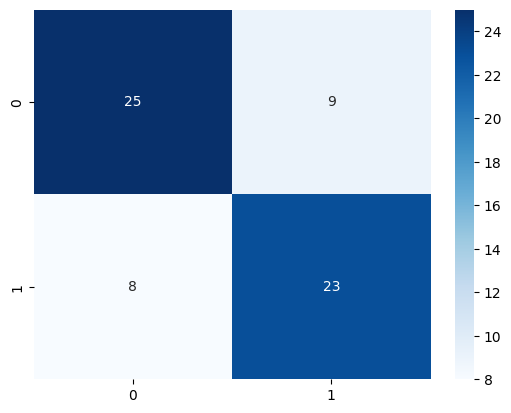

In [ ]:
# Obtaining the confusion matrix
cm = confusion_matrix(yTest, predictions)
print("Confusion Matrix")
print(cm)
sn.heatmap(cm, annot=True, cmap="Blues")

# Obtainig the precision score
precision = precision_score(yTest, predictions)
print("Precision:", precision)

# Obtainig the recall score
recall = recall_score(yTest, predictions)
print("Recall:", recall)

# Obtainig the F1-score
f1score = f1_score(yTest, predictions)
print("F1-score:", f1score)

### Random Forest Classifier

Random forest can be used for classifications as well as regression. It uses multiple decisions tree, and the prediction is obtained from the majority votes of a prediction. In a binary classification an outcome is predicted based on a set of independent variables and this suits the random forest algorithm as it can handle non-linear relationships by creating decision trees for random subsets of the variables. As the dataset considered has many features, random forest classifier is able to detect and use the most influential features for determining the outcome. Further, it can handle overfitting of data which is a common issue found with binary classification models.

In [ ]:
#Creating a model using Random Forest Classifier
# create a random forest object
creadit_randomForest = RandomForestClassifier()

# fit the model on the training data
creadit_randomForest.fit(xTrain, yTrain)


RandomForestClassifier()

*Evaluating the accuracy of the model*

In [ ]:
# Making predictions using Random Forest Classifier

predictions = creadit_randomForest.predict(xTest)

 # Printing the accuracy score of trained model

accuracy_score(yTest,predictions)

0.6923076923076923

***Evaluating the confusion matrix, precision, recall and F1-score***

Accuracy 	- Measures the percentage of correctly classified instances out of all instances.

Precision 	- Measures the percentage of true positives which are among all predicted positive instances. 

Recall 	- Measures the percentage of 	true positives which are among all actual positive instances. 

F1-score 	- Measures accuracy with the use of precision and recall. It is the harmonic mean.


Confusion matrix – It is a table that shows true positives, false positives, true negatives, and false negatives


Confusion Matrix
[[24 10]
 [10 21]]
Precision: 0.6774193548387096
Recall: 0.6774193548387096
F1-score: 0.6774193548387096


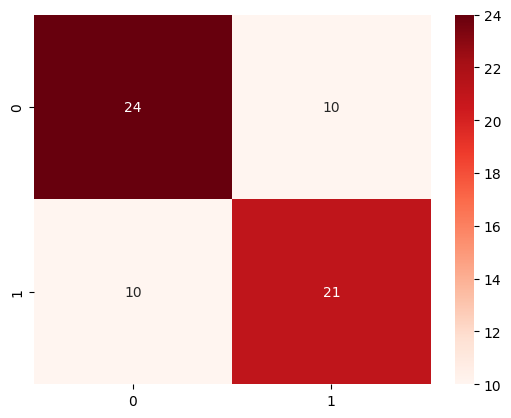

In [ ]:
# Obtaining the confusion matrix
cm = confusion_matrix(yTest, predictions)
print("Confusion Matrix")
print(cm)
sn.heatmap(cm, annot=True, cmap="Reds")

# Obtainig the precision score
precision = precision_score(yTest, predictions)
print("Precision:", precision)

# Obtainig the recall score
recall = recall_score(yTest, predictions)
print("Recall:", recall)

# Obtainig the F1-score
f1score = f1_score(yTest, predictions)
print("F1-score:", f1score)

### Support Vector Machine

Support vector machine is also a very popular supervised learning algorithm. It is mainly used for classification problems while it can also be used for regressions problems. There are several types of kernel functions that can be used with support vector machines like linear, polynomial and Radial Based Function (RBF). For this work the RBF was used as it is more general and is less affected by the structure of data.

In [ ]:


# Creating a SVM model
svm = SVC(kernel='linear')

# Fitting the model with the training data
svm.fit(xTrain, yTrain)



SVC(kernel='linear')

*Evaluating the accuracy of the model*

In [ ]:
# Predicting the class of the test data
y_pred = svm.predict(xTest)

# Obtaining the accuracy of the trained model
accuracy = accuracy_score(yTest, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7538461538461538


***Evaluating the confusion matrix, precision, recall and F1-score***

Accuracy 	- Measures the percentage of correctly classified instances out of all instances.

Precision 	- Measures the percentage of true positives which are among all predicted positive instances. 

Recall 	- Measures the percentage of 	true positives which are among all actual positive instances. 

F1-score 	- Measures accuracy with the use of precision and recall. It is the harmonic mean.


Confusion matrix – It is a table that shows true positives, false positives, true negatives, and false negatives


Confusion Matrix
[[26  8]
 [ 8 23]]
Precision: 0.7419354838709677
Recall: 0.7419354838709677
F1-score: 0.7419354838709677


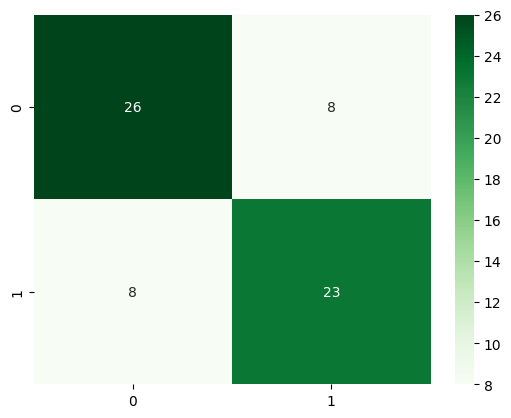

In [ ]:
# Obtaining the confusion matrix
cm = confusion_matrix(yTest, y_pred)
print("Confusion Matrix")
print(cm)
sn.heatmap(cm, annot=True, cmap="Greens")

# Obtainig the precision score
precision = precision_score(yTest, y_pred)
print("Precision:", precision)

# Obtainig the recall score
recall = recall_score(yTest, y_pred)
print("Recall:", recall)

# Obtainig the F1-score
f1score = f1_score(yTest, y_pred)
print("F1-score:", f1score)

### K-Nearest Neighbor

This algorithm categorizes new data into the most similar categories available from the training data and it is considered to be one of the simplest algorithms used for supervised learning. K-nearest neighbor can also be used for both regression as well as classification and it does not make any assumptions about the underlying data. This makes the algorithm suitable for a wide variety of structured and unstructured data.

In [ ]:


#Splitting the dataset as trainig and test data. 10% is taken as test data
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.1,random_state=12)


# Scale the numerical features
scaler = StandardScaler()
xTrain[['duration', 'credit_amount', 'installment_commitment', 'property_magnitude', 'age', 'existing_credits', 'num_dependents', 'residence_since']] = scaler.fit_transform(xTrain[['duration', 'credit_amount', 'installment_commitment', 'property_magnitude', 'age', 'existing_credits', 'num_dependents', 'residence_since']])
xTest[['duration', 'credit_amount', 'installment_commitment', 'property_magnitude', 'age', 'existing_credits', 'num_dependents', 'residence_since']] = scaler.transform(xTest[['duration', 'credit_amount', 'installment_commitment', 'property_magnitude', 'age', 'existing_credits', 'num_dependents', 'residence_since']])

In [ ]:

# Creating a k-nearest classifier
knn = KNeighborsClassifier(n_neighbors=13)

# Fitting the training data
knn.fit(xTrain, yTrain)



KNeighborsClassifier(n_neighbors=13)

*Evaluating the accuracy of the model*

In [ ]:
# Predicting the class of the test data
y_Pred = knn.predict(xTest)

# obtaining the accuracy of the trained model
accuracy = accuracy_score(yTest, y_Pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.6923076923076923


***Evaluating the confusion matrix, precision, recall and F1-score***

Accuracy 	- Measures the percentage of correctly classified instances out of all instances.

Precision 	- Measures the percentage of true positives which are among all predicted positive instances. 

Recall 	- Measures the percentage of 	true positives which are among all actual positive instances. 

F1-score 	- Measures accuracy with the use of precision and recall. It is the harmonic mean.


Confusion matrix – It is a table that shows true positives, false positives, true negatives, and false negatives


Confusion Matrix
[[26 10]
 [10 19]]
Precision: 0.6551724137931034
Recall: 0.6551724137931034
F1-score: 0.6551724137931034


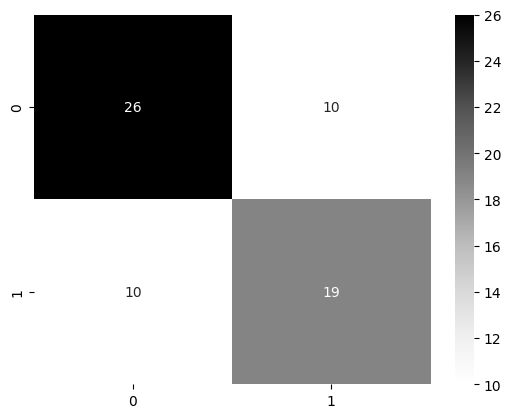

In [ ]:
# Obtaining the confusion matrix
cm = confusion_matrix(yTest, y_Pred)
print("Confusion Matrix")
print(cm)
sn.heatmap(cm, annot=True, cmap="Greys")

# Obtainig the precision score
precision = precision_score(yTest, y_Pred)
print("Precision:", precision)

# Obtainig the recall score
recall = recall_score(yTest, y_Pred)
print("Recall:", recall)

# Obtainig the F1-score
f1score = f1_score(yTest, y_Pred)
print("F1-score:", f1score)